In [9]:
import requests

for i in range(1, 35):
    url = f"https://www.skool.com/discovery?fl=paid&p={i}"
    response = requests.get(url)

    if response.status_code == 200:
        # Save the HTML content to a file
        with open(f"page_content_{i}.html", "w", encoding="utf-8") as file:
            file.write(response.text)
        print(f"HTML content saved to page_content_{i}.html")
    else:
        print("Failed to retrieve the page. Status code:", response.status_code)


HTML content saved to page_content_1.html
HTML content saved to page_content_2.html
HTML content saved to page_content_3.html
HTML content saved to page_content_4.html
HTML content saved to page_content_5.html
HTML content saved to page_content_6.html
HTML content saved to page_content_7.html
HTML content saved to page_content_8.html
HTML content saved to page_content_9.html
HTML content saved to page_content_10.html
HTML content saved to page_content_11.html
HTML content saved to page_content_12.html
HTML content saved to page_content_13.html
HTML content saved to page_content_14.html
HTML content saved to page_content_15.html
HTML content saved to page_content_16.html
HTML content saved to page_content_17.html
HTML content saved to page_content_18.html
HTML content saved to page_content_19.html
HTML content saved to page_content_20.html
HTML content saved to page_content_21.html
HTML content saved to page_content_22.html
HTML content saved to page_content_23.html
HTML content saved t

In [44]:
from bs4 import BeautifulSoup
import pandas as pd

data = []
# Load the HTML content
for i in range(1, 16):

    with open(f"tech/page_content_{i}.html", "r", encoding="utf-8") as file:
        soup = BeautifulSoup(file, "html.parser")

    # Locate all divs that match the structure provided
    cards = soup.find_all("div", class_="styled__DiscoveryCardContent-sc-13ysp3k-4")

    for card in cards:
        try:
            # Extract community name
            name = card.find("span", class_="styled__GroupNameWrapper-sc-dph3q3-0").text.strip()

            # Extract members and price per month
            meta_info = card.find("div", class_="styled__DiscoveryCardMeta-sc-13ysp3k-7").text
            meta_parts = meta_info.split(" • ")

            # Extract members count (convert to integer after removing "Members")
            members = int(meta_parts[1].replace("Members", "").strip())

            # Extract price per month (the third item containing "$")
            price_text = meta_parts[2]
            price = float(price_text.replace("$", "").replace("/month", "").strip())

            # Calculate revenue per month
            revenue = members * price

            # Append extracted data to the list
            data.append(
                {"Community Name": name, "Members": members, "Price per Month": price, "Revenue per Month": revenue, "Page Number": i}
            )

        except (AttributeError, ValueError, IndexError):
            # Handle cases where expected data is missing
            # print(f"Missing or malformed data in a card, skipping...")
            pass

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
display(df)

,Community Name,Members,Price per Month,Revenue per Month,Page Number
0,Only AI,456,49.0,22344.0,1
1,KI Buch Club 🔥 ⭐⭐⭐⭐⭐,243,97.0,23571.0,1
2,IA Masters Automations,557,54.0,30078.0,1
3,AI Guy Academy,534,50.0,26700.0,1
4,Imperio Digital,243,37.0,8991.0,1
...,...,...,...,...,...
343,AI Growth Management Group,10,50.0,500.0,15
344,Tobi Wan Coaching,3,50.0,150.0,15
345,Circle of Trust,4,15.0,60.0,15
346,AI Risk & Compliance Sandbox,2,49.0,98.0,15


In [36]:
summary = df.describe()
display(summary)

,Members,Price per Month,Revenue per Month,Page Number
count,348.000000,348.000000,348.000000,348.000000
mean,95.681034,81.965517,6162.313218,7.712644
std,146.975341,149.875872,18933.209236,4.032742
min,2.000000,1.000000,8.000000,1.000000
25%,12.000000,20.000000,443.250000,4.000000
50%,33.000000,48.000000,1390.500000,8.000000
75%,116.000000,97.000000,4906.500000,11.000000
max,915.000000,999.000000,289710.000000,15.000000


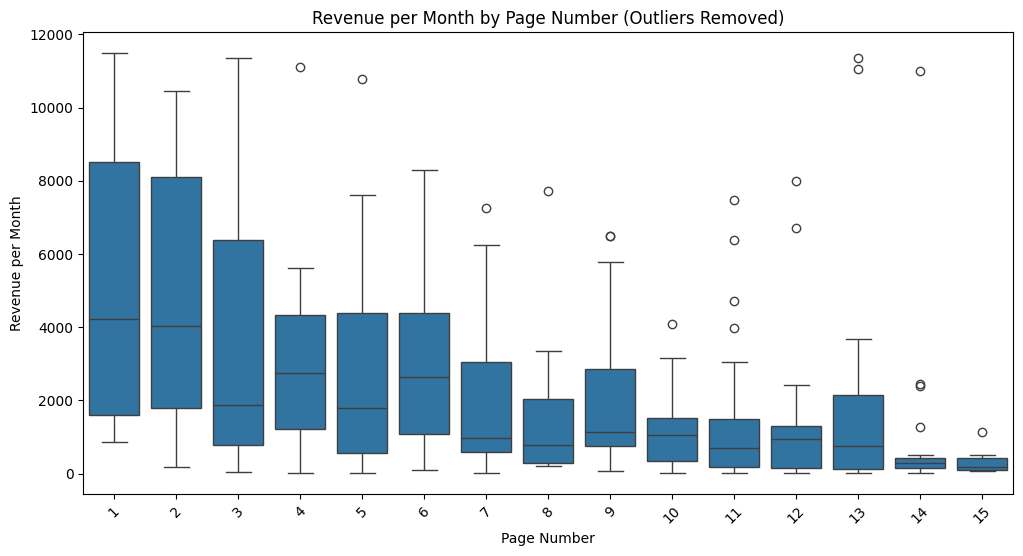

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already created and has the "Revenue per Month" and "Page Number" columns

# Calculate Q1, Q3, and IQR for the "Revenue per Month" column
Q1 = df["Revenue per Month"].quantile(0.25)
Q3 = df["Revenue per Month"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_filtered = df[(df["Revenue per Month"] >= lower_bound) & (df["Revenue per Month"] <= upper_bound)]

# Plotting without outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x="Page Number", y="Revenue per Month", data=df_filtered)

# Adding titles and labels
plt.title("Revenue per Month by Page Number (Outliers Removed)")
plt.xlabel("Page Number")
plt.ylabel("Revenue per Month")
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [24]:
# Calculate Q1, Q3, and IQR for the "Revenue per Month" column
Q1 = df["Revenue per Month"].quantile(0.25)
Q3 = df["Revenue per Month"].quantile(0.75)
IQR = Q3 - Q1

# Define upper bound for high MRR outliers
upper_bound = Q3 + 1.5 * IQR

# Filter out high MRR outliers
high_mrr_outliers = df[df["Revenue per Month"] > upper_bound]

top_mrr = high_mrr_outliers.sort_values(by="Revenue per Month", ascending=False)

# Print the top 10 entries
display(top_mrr)

,Community Name,Members,Price per Month,Revenue per Month,Page Number
116,Digital Renaissance (BETA),290,999.0,289710.0,5
10,KI Club,425,220.0,93500.0,1
5,The AI Surfer Circle,851,97.0,82547.0,1
82,AIpreneurs (Premium),77,999.0,76923.0,4
34,KI Creator Akademie,299,209.0,62491.0,2
43,KI @ Work Community,396,149.0,59004.0,3
8,New Society,573,97.0,55581.0,1
243,CPM* Private Community,48,999.0,47952.0,11
148,Speedrun To Promotion,81,497.0,40257.0,7
27,NATURAL 20,915,37.0,33855.0,2


In [19]:
# Create a binary column to mark outliers (1 for outliers, 0 for non-outliers)
df["is_outlier"] = df["Revenue per Month"] > upper_bound

# Calculate correlation between 'Price per Month' and 'is_outlier'
correlation = df[["Price per Month", "is_outlier"]].corr()

# Print the correlation matrix
print("Correlation between Price per Month and Likelihood of Being an Outlier:")
print(correlation)

Correlation between Price per Month and Likelihood of Being an Outlier:
                 Price per Month  is_outlier
Price per Month         1.000000    0.311935
is_outlier              0.311935    1.000000


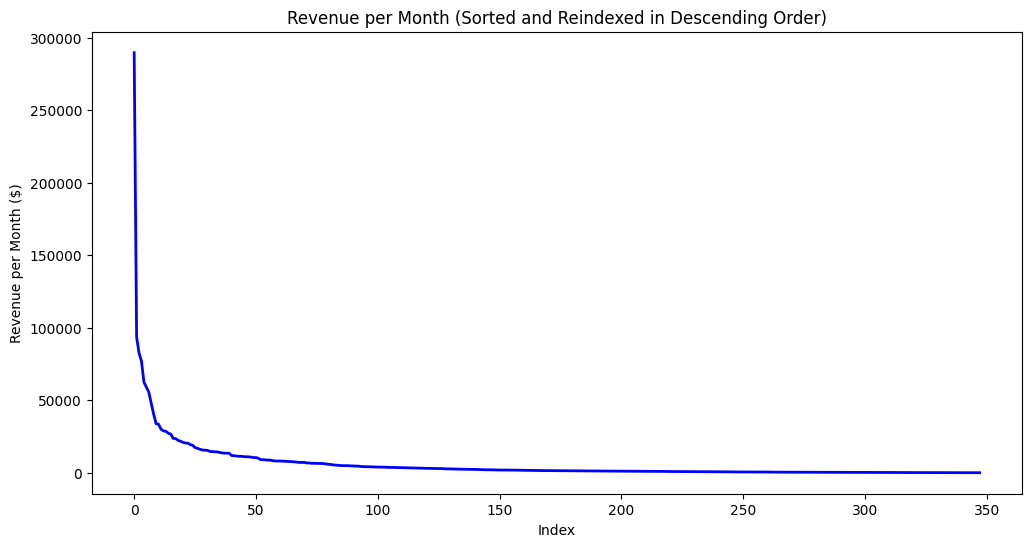

In [28]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Revenue per Month' in descending order
df_sorted = df.sort_values(by="Revenue per Month", ascending=False)

# Reindex the DataFrame to have a sequential index
df_sorted_reset = df_sorted.reset_index(drop=True)

# Plotting Revenue per Month
plt.figure(figsize=(12, 6))
plt.plot(
    df_sorted_reset.index, df_sorted_reset["Revenue per Month"], label="Revenue per Month", color="blue", linewidth=2
)

# Adding titles and labels
plt.title("Revenue per Month (Sorted and Reindexed in Descending Order)")
plt.xlabel("Index")
plt.ylabel("Revenue per Month ($)")

# Show the plot
plt.show()

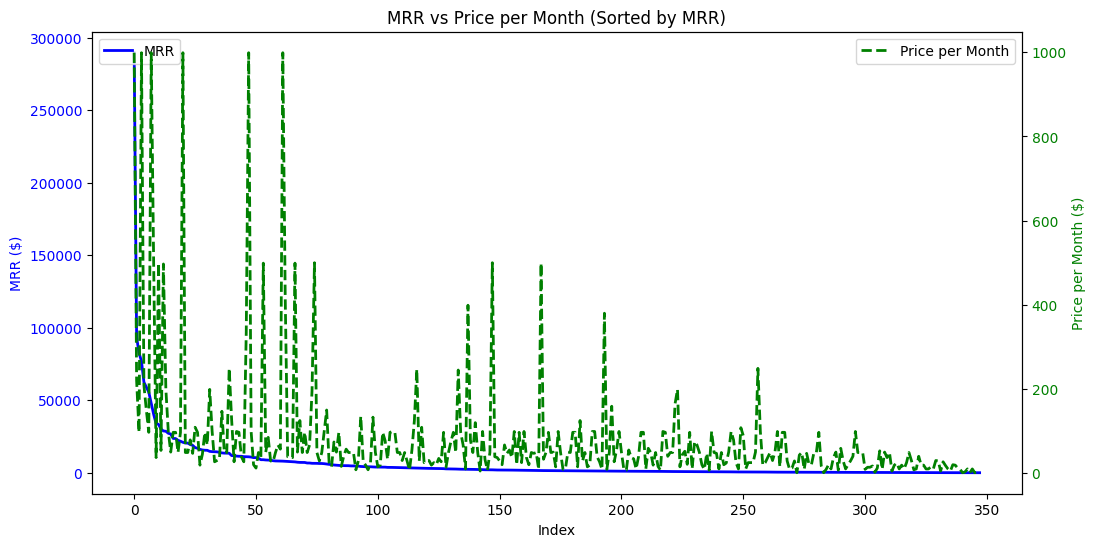

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort the DataFrame by 'Revenue per Month' (MRR) in descending order
df_sorted = df.sort_values(by="Revenue per Month", ascending=False)

# Reindex the DataFrame to have a sequential index
df_sorted = df_sorted.reset_index(drop=True)

# Apply a moving average to smooth the 'Price per Month' line
window_size = 5  # You can adjust this window size for more or less smoothing
df_sorted['Smoothed Price'] = df_sorted['Price per Month'].rolling(window=window_size, min_periods=1).mean()

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot MRR on the first axis (left y-axis)
ax1.plot(df_sorted.index, df_sorted["Revenue per Month"], label="MRR", color="blue", linewidth=2)
ax1.set_xlabel("Index")
ax1.set_ylabel("MRR ($)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a second y-axis for Smoothed Price per Month
ax2 = ax1.twinx()
ax2.plot(
    df_sorted.index, df_sorted["Smoothed Price"], label="Smoothed Price per Month", color="green", linestyle="--", linewidth=2
)
ax2.set_ylabel("Price per Month ($)", color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Adding titles and a legend
plt.title("MRR vs Smoothed Price per Month (Sorted by MRR)")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the plot
plt.show()


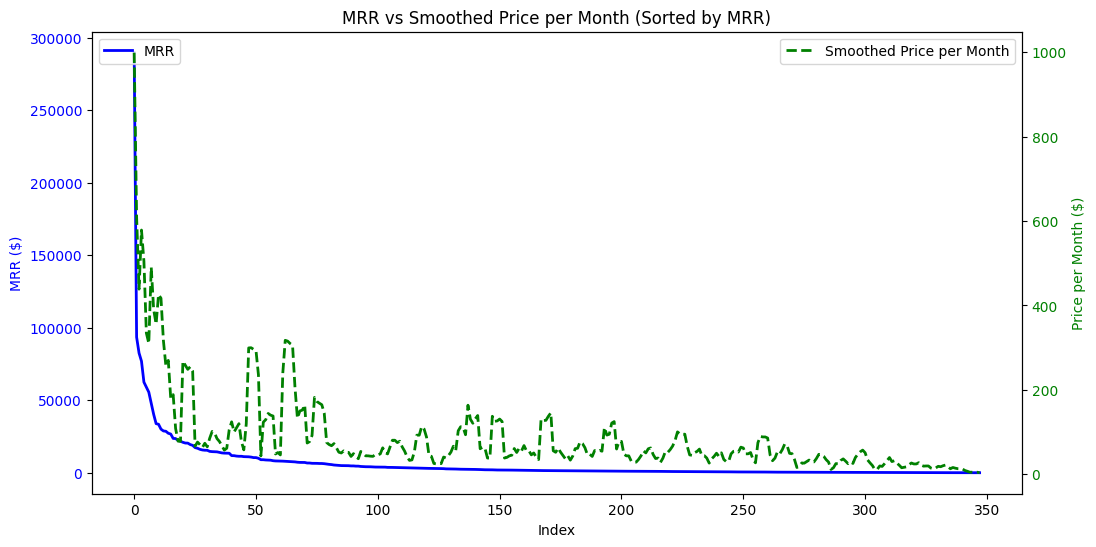

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort the DataFrame by 'Revenue per Month' (MRR) in descending order
df_sorted = df.sort_values(by="Revenue per Month", ascending=False)

# Reindex the DataFrame to have a sequential index
df_sorted = df_sorted.reset_index(drop=True)

# Apply a moving average to smooth the 'Price per Month' line
window_size = 5  # You can adjust this window size for more or less smoothing
df_sorted["Smoothed Price"] = df_sorted["Price per Month"].rolling(window=window_size, min_periods=1).mean()

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot MRR on the first axis (left y-axis)
ax1.plot(df_sorted.index, df_sorted["Revenue per Month"], label="MRR", color="blue", linewidth=2)
ax1.set_xlabel("Index")
ax1.set_ylabel("MRR ($)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a second y-axis for Smoothed Price per Month
ax2 = ax1.twinx()
ax2.plot(
    df_sorted.index,
    df_sorted["Smoothed Price"],
    label="Smoothed Price per Month",
    color="green",
    linestyle="--",
    linewidth=2,
)
ax2.set_ylabel("Price per Month ($)", color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Adding titles and a legend
plt.title("MRR vs Smoothed Price per Month (Sorted by MRR)")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the plot
plt.show()

In [38]:
display(df[df["Price per Month"] > 500].sort_values(by="Revenue per Month", ascending=False))

,Community Name,Members,Price per Month,Revenue per Month,Page Number
116,Digital Renaissance (BETA),290,999.0,289710.0,5
82,AIpreneurs (Premium),77,999.0,76923.0,4
243,CPM* Private Community,48,999.0,47952.0,11
340,Agexa Intelligence,21,999.0,20979.0,14
338,British Royal Yacht Club,11,999.0,10989.0,14
293,THE DIRT CREW,8,999.0,7992.0,12


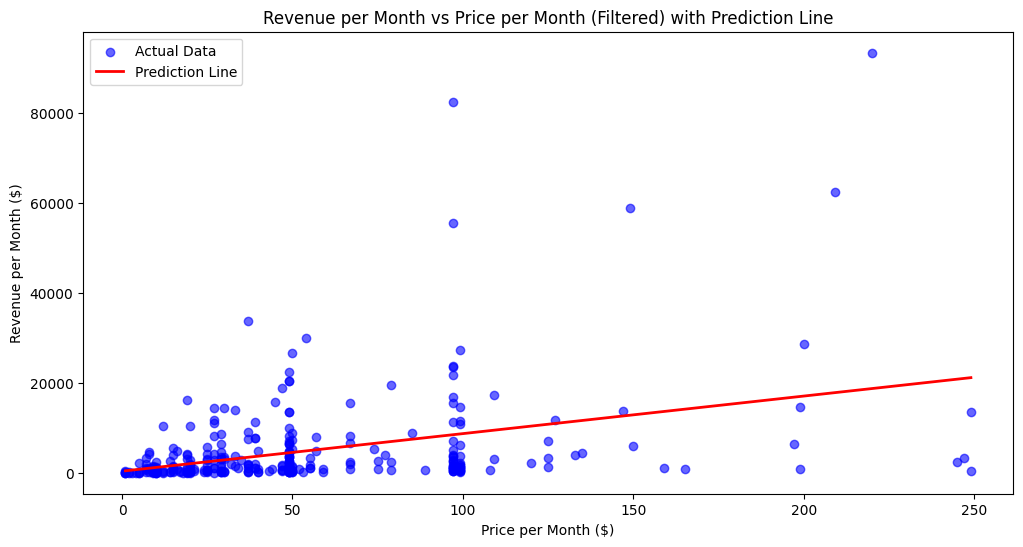

In [40]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Filter the DataFrame to only include prices below or equal to $250
df_filtered = df[df["Price per Month"] <= 250]

# Extract the features and target variable
X = df_filtered["Price per Month"].values.reshape(-1, 1)  # Feature (Price per Month)
y = df_filtered["Revenue per Month"].values  # Target (Revenue per Month)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate predictions across the range of filtered price values
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(X_range)

# Plotting the scatterplot of the filtered data
plt.figure(figsize=(12, 6))
plt.scatter(
    df_filtered["Price per Month"], df_filtered["Revenue per Month"], color="blue", label="Actual Data", alpha=0.6
)

# Plotting the regression line
plt.plot(X_range, y_pred, color="red", linewidth=2, label="Prediction Line")

# Adding labels and title
plt.title("Revenue per Month vs Price per Month (Filtered) with Prediction Line")
plt.xlabel("Price per Month ($)")
plt.ylabel("Revenue per Month ($)")
plt.legend()

# Show the plot
plt.show()

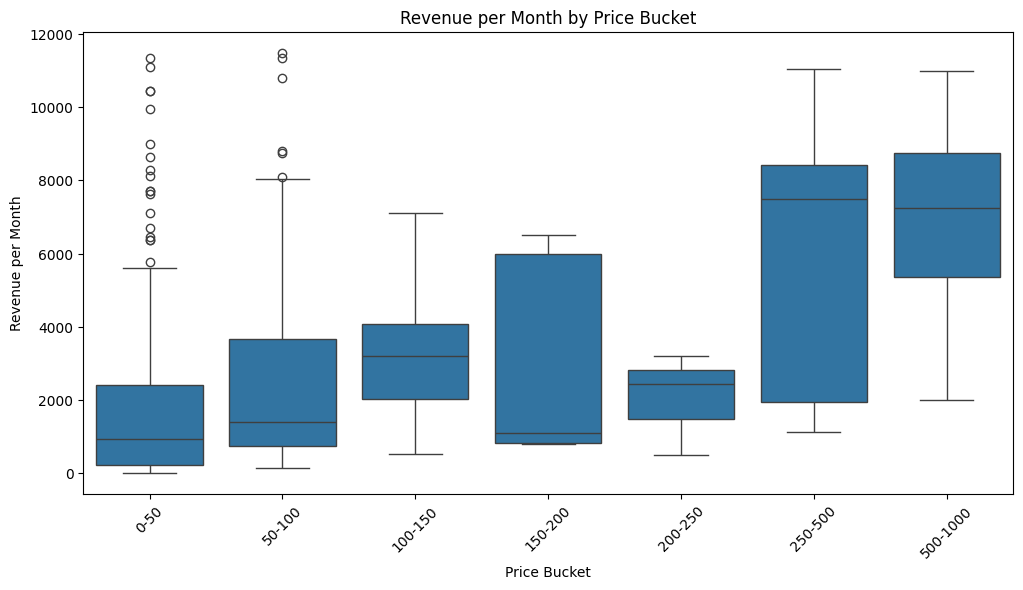

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already created and has the "Revenue per Month" column

# Define the price per month buckets
bins = [0, 50, 100, 150, 200, 250, 500, 1000]  # Adjust the ranges as needed
labels = ["0-50", "50-100", "100-150", "150-200", "200-250", "250-500", "500-1000"]
df["Price Bucket"] = pd.cut(df["Price per Month"], bins=bins, labels=labels, right=False)

# Calculate Q1, Q3, and IQR for the "Revenue per Month" column
Q1 = df["Revenue per Month"].quantile(0.25)
Q3 = df["Revenue per Month"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_filtered = df[(df["Revenue per Month"] >= lower_bound) & (df["Revenue per Month"] <= upper_bound)]

# Plotting without outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x="Price Bucket", y="Revenue per Month", data=df_filtered, order=labels)

# Adding titles and labels
plt.title("Revenue per Month by Price Bucket")
plt.xlabel("Price Bucket")
plt.ylabel("Revenue per Month")
plt.xticks(rotation=45)

# Show the plot
plt.show()

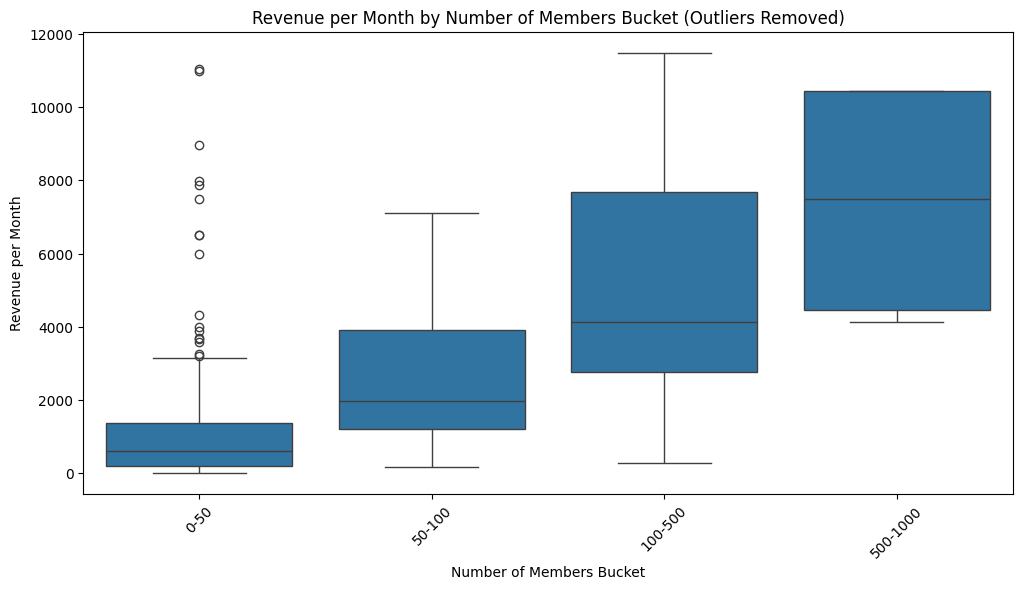

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already created and has the "Revenue per Month" and "Number of Members" columns

# Define the number of members buckets
member_bins = [0, 50, 100, 500, 1000]  # Adjust the ranges as needed
member_labels = ["0-50", "50-100", "100-500", "500-1000"]
df["Member Bucket"] = pd.cut(df["Members"], bins=member_bins, labels=member_labels, right=False)

# Calculate Q1, Q3, and IQR for the "Revenue per Month" column
Q1 = df["Revenue per Month"].quantile(0.25)
Q3 = df["Revenue per Month"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_filtered = df[(df["Revenue per Month"] >= lower_bound) & (df["Revenue per Month"] <= upper_bound)]

# Plotting without outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x="Member Bucket", y="Revenue per Month", data=df_filtered, order=member_labels)

# Adding titles and labels
plt.title("Revenue per Month by Number of Members Bucket (Outliers Removed)")
plt.xlabel("Number of Members Bucket")
plt.ylabel("Revenue per Month")
plt.xticks(rotation=45)

# Show the plot
plt.show()